#### 3 Probability
   #### • Probability Distribution
   #### • Normal Distribution
   #### • Advanced Statistical Concepts
#### 4 Covariance and Correlation
   #### • Central Limit Theorem
   #### • Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv(r"C:\Users\ruchi\Videos\dataset\DataSets_For_Learning\tip.csv")

In [4]:
dataset.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
data_corr=dataset.select_dtypes(["float64","int64"]).corr()
data_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [15]:
data_cov=dataset.select_dtypes(["float64","int64"]).cov()
data_cov

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


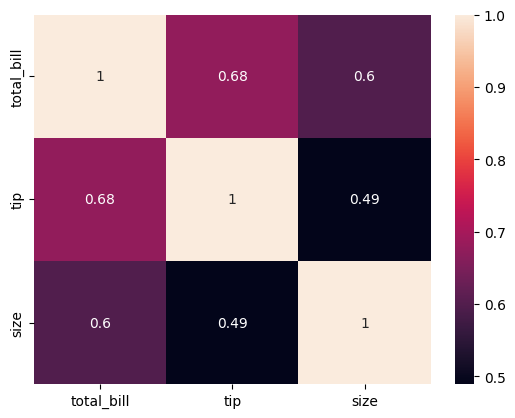

In [14]:
plt.Figure(figsize=(4,3))
sns.heatmap(data_corr,annot=True)
plt.show()

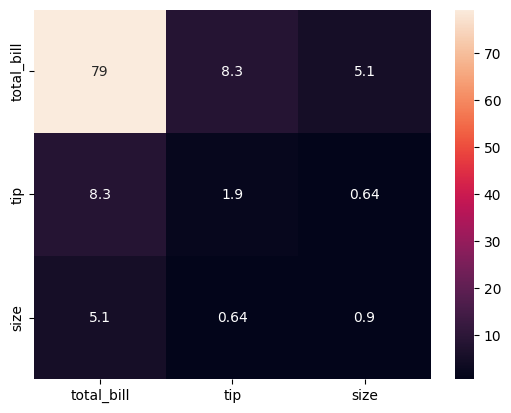

In [16]:
plt.Figure(figsize=(4,3))
sns.heatmap(data_cov,annot=True)
plt.show()

### Central Limit Theorem

In [21]:
pop_data = [np.random.randint(10,100) for i in range(10000)] 
pop_table = pd.DataFrame({"Pop_data":pop_data})
pop_table

,Pop_data
0,55
1,20
2,27
3,15
4,63
...,...
9995,32
9996,85
9997,81
9998,11


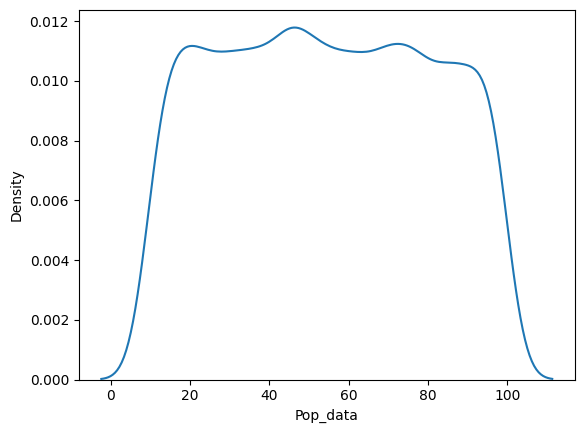

In [22]:
plt.Figure(figsize=(4,3))
sns.kdeplot(x="Pop_data",data=pop_table)
plt.show()

In [32]:
sample_mean = []
for no_sample in range(50):
    sample_data = []
    for data in range(500):
        sample_data.append(np.random.choice(pop_data))
    sample_mean.append(np.mean(sample_data))
        

In [33]:
sample_M = pd.DataFrame({"Sample_Mean": sample_mean})

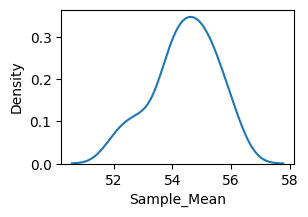

In [34]:
plt.figure(figsize=(3,2))
sns.kdeplot(x="Sample_Mean",data=sample_M)
plt.show()

## Hypothesis Testing  

In [3]:
import scipy.stats as st
import numpy as np

In [ ]:
st.norm.ppf(0.95) #Z-value can be found by using this function

np.float64(1.6448536269514722)

In [ ]:
# Example question 1
s_x =90
p_u = 82
p_std = 20
n = 81
ap = 0.05

In [9]:
z_cal = (s_x - p_u) / (p_std/np.sqrt(n))
z_cal

np.float64(3.5999999999999996)

In [8]:
z_table = st.norm.ppf(1-ap)
z_table

np.float64(1.6448536269514722)

In [12]:
if z_table < z_cal :
    print("ha is right")
else:
    print("ho is right")
    

ha is right


### T-test

In [17]:
import scipy.stats as st
import numpy as np

In [16]:
t_table= st.t.ppf(0.05,24)
t_table

np.float64(-1.7108820799094282)

In [ ]:
t1_table= st.t.ppf(0.25,38)
t1_table

In [18]:
t_cal = (80-75)/(np.sqrt((25/20)+(26/20)))
t_cal

np.float64(3.1311214554257476)

### Chi-Square Test

In [19]:
import numpy as np

##### Example 1

In [21]:
ob = np.array([22,17,20,26,22,13])
ex=np.array([20,20,20,20,20,20])

In [25]:
np.sum(np.square(ob-ex)/ex)

np.float64(5.1000000000000005)

#### Eample 2

In [28]:
row1 = np.array([40,45,25,10])
row2 = np.array([35,30,20,30])

In [29]:
np.sum(row1)+np.sum(row2)

np.int64(235)

In [33]:
sum_r1 = np.sum(row1)
sum_r2 = np.sum(row2)
sum_row = np.array([sum_r1,sum_r2])
sum_row

array([120, 115])

In [31]:
sum_cal = row1+row2
sum_cal

array([75, 75, 45, 40])

In [35]:
exp = []
for i in sum_row :
    for j in sum_cal:
        value = (i*j)/235
        exp.append(value)

In [38]:
exp

[np.float64(38.297872340425535),
 np.float64(38.297872340425535),
 np.float64(22.97872340425532),
 np.float64(20.425531914893618),
 np.float64(36.702127659574465),
 np.float64(36.702127659574465),
 np.float64(22.02127659574468),
 np.float64(19.574468085106382)]

In [39]:
obj = np.array([40,45,25,10,35,30,20,30])
obj

array([40, 45, 25, 10, 35, 30, 20, 30])

In [40]:
obj - exp

array([  1.70212766,   6.70212766,   2.0212766 , -10.42553191,
        -1.70212766,  -6.70212766,  -2.0212766 ,  10.42553191])

In [41]:
len(obj),len(exp)

(8, 8)

In [45]:
np.sum(np.square(obj - exp)/exp)

np.float64(13.788747987117553)